# Exercises: random variables



## Exercise: Wheel of Fortune

Suppose you spin a wheel of fortune many times. Each time, one of the numbers m_1, m_2, ..., m_n comes up with a probability p_1, p_2, ..., p_n, and this is how much money you would get from each spin. What amount of money do you expect to get per spin?

To help answer this question, write a function where you spin the wheel *num_experiments* times and compute the average amount received per spin.


42.82


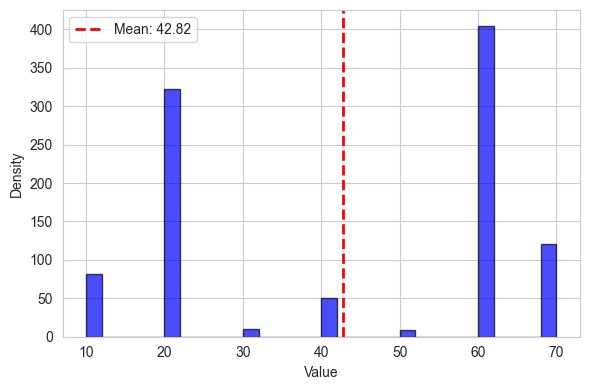

In [8]:
import numpy as np
from util import plot_many_values_with_mean

wheel_prob_dist = {10: 0.1, 20: 0.3, 30: 0.01, 40: 0.05, 50: 0.01, 60: 0.4, 70: 0.13}

def spin_wheel(num_experiments: int, wheel_prob_dist: dict):

    return np.random.choice(list(wheel_prob_dist.keys()), size=num_experiments, p=list(wheel_prob_dist.values()))

def compute_mean(sample_values):
    avg_result = sum(sample_values) / sample_values.shape[0]
    return avg_result

spin_results = spin_wheel(1000, wheel_prob_dist)
print(compute_mean(spin_results))
plot_many_values_with_mean(spin_results)

## Example: The quiz problem

Consider a quiz game where a person is given two questions and must decide which one to answer first. Question 1 will be answered correctly with a probability of 0.8 and the person will then receive a prize of 1000 NOK, while question 2 will be answered correctly with a probability of 0.5, and the person will then receive a prize of 2000 NOK. If the first question attempted is answered incorrectly, the quiz terminates, i.e., the person is not allowed to attempt the second question. If the first question is answered correctly, the person is allowed to attempt the second question. Which question should be answered first to maximize the expected value of the total prize money received?

Write a function that will determine which question should be answered first.

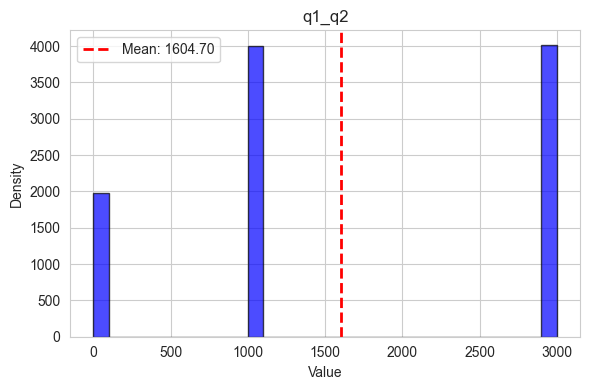

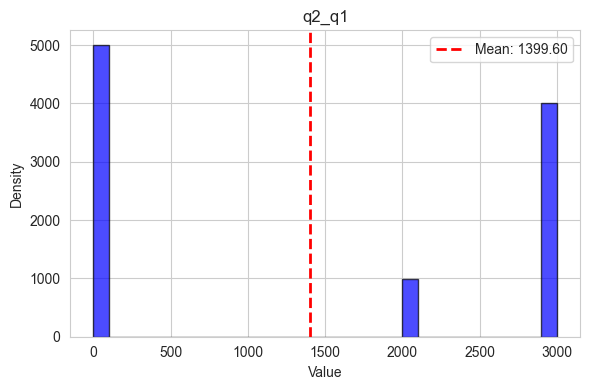

{'q1_q2': 1604.7, 'q2_q1': 1399.6}

In [9]:
import random
from util import plot_many_values_with_mean

correct_answer_probs = {'q1': 0.8, 'q2': 0.5}
prizes = {'q1': 1000, 'q2': 2000}

def simulate_one_quiz_run(correct_answer_probs: dict, prizes: dict, answer_sequence: list) -> int:
    if random.uniform(0, 1) < correct_answer_probs[answer_sequence[0]]:
        if random.uniform(0, 1) < correct_answer_probs[answer_sequence[1]]:
            return sum(prizes.values())
        else:
            return prizes[answer_sequence[0]]
    else:
        return 0

def quiz_problem(correct_answer_probs: dict, prizes: dict, num_experiments: int):
    
    answer_sequences = [['q1', 'q2'], ['q2', 'q1']]
    expected_prizes = {}
    
    for answer_sequence in answer_sequences:
        all_prizes = [simulate_one_quiz_run(correct_answer_probs, prizes, answer_sequence) for _ in range(num_experiments)]

        plot_many_values_with_mean(all_prizes, "_".join(answer_sequence))
        
        expected_prizes["_".join(answer_sequence)] = sum(all_prizes) / num_experiments

    return expected_prizes
            
quiz_problem(correct_answer_probs, prizes, 10000)

## Exercise: power plant

A power utility can supply electricity to a city from *n* different power plants. Power plant *i* fails with probability *p_i*, independent of others.

- Suppose that any one plant can produce enough electricity to supply the entire city. What is the probability that the city will experience a black-out?
- Suppose that two power plants are necessary to keep the city from a black-out. Find the probability that the city will experience a black-out.

In [10]:
failure_probabilities = [0.01, 0.2, 0.4, 0.12]

import random

def simulate_plant(failure_prob: float) -> bool:
    """return 1 if plant is working and 0 otherwise"""
    return random.random() > failure_prob

def simulate_all_plants(failure_probs: list) -> list:
    return [simulate_plant(p) for p in failure_probs]

def power_blackout_simulation(failure_probs, n_experiments=10000):
    blackouts_need_one = 0
    blackouts_need_two = 0

    for _ in range(n_experiments):
        working_plants = simulate_all_plants(failure_probs)
        if sum(working_plants) < 1:
            blackouts_need_one += 1
        if sum(working_plants) < 2:
            blackouts_need_two += 1

    print(f"City needs 1 plant: P(blackout) = {blackouts_need_one / n_experiments}")
    print(f"City needs 2 plants: P(blackout) = {blackouts_need_two / n_experiments}")

power_blackout_simulation(failure_probabilities)

City needs 1 plant: P(blackout) = 0.0002
City needs 2 plants: P(blackout) = 0.0108


## Exercise: The Hat Problem

Suppose that *n* people throw their hats in a box and then each picks one hat at random, where all people are equally likely to pick up any hat. What is the expected number of people that get back their own hat? Write a function that simulates this experiment and estimates this value. Run the function for *n* in [10, 40, 100] - what happens with this estimated value?

In [11]:
# there are n people, labeled 0 to n-1 and n hats labeled 0 to n-1

def throw_hats_in_box(n: int) -> list:
    hats = list(range(n))
    # random.shuffle(hats) # random permutation of n hats, optional, doesn't affect the outcome because of how the hats are taken from the box
    return hats

def get_hat(hats: list) -> int:
    return random.choice(hats)

def hat_simulation(n_people: int, n_experiments: int):
    total_matches = 0
    for _ in range(n_experiments):
        matches = 0
        hats = throw_hats_in_box(n_people)
        for person in range(n_people):
            taken_hat = get_hat(hats)
            hats = [hat for hat in hats if hat != taken_hat]
            matches += taken_hat == person # does hat number match the person
        total_matches += matches

    return total_matches / n_experiments

hat_simulation(100, 10000)

0.9921

## Exercise: conditional probability of a letter

Given the text, write two functions:
- one that will compute the probability of a letter in the text, with the letter provided as an input argument,
- one that will compute the probability of a letter in the text, given the previous letter, where both letters are provided as input arguments.

In [12]:
import re

original_text = """To be, or not to be, that is the question, Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune,Or to take arms against a sea of troubles,And by opposing end them? To die: to sleep;No more; and by a sleep to say we endThe heart-ache and the thousand natural shocksThat flesh is heir to, 'tis a consummationDevoutly to be wish'd. To die, to sleep;To sleep: perchance to dream: ay, there's the rub;For in that sleep of death what dreams may comeWhen we have shuffled off this mortal coil,Must give us pause: there's the respectThat makes calamity of so long life;For who would bear the whips and scorns of time,The oppressor's wrong, the proud man's contumely,The pangs of despised love, the law's delay,The insolence of office and the spurnsThat patient merit of the unworthy takes,When he himself might his quietus makeWith a bare bodkin? who would fardels bear,To grunt and sweat under a weary life,But that the dread of something after death,The undiscover'd country from whose bournNo traveller returns, puzzles the willAnd makes us rather bear those ills we haveThan fly to others that we know not of?Thus conscience does make cowards of us all;And thus the native hue of resolutionIs sicklied o'er with the pale cast of thought,And enterprises of great pith and momentWith this regard their currents turn awry,And lose the name of action.--Soft you now!The fair Ophelia! Nymph, in thy orisonsBe all my sins remember'd."""
text = re.sub(r"[\.\,\:\' \;\n\-\?\!]*", "", original_text).lower()

# print(original_text)
# print(text)

def compute_marginal_probability(letter: str, text: str) -> float:
    count = text.count(letter)
    probability = round(count / len(text), 3)

    return probability

def compute_conditional_probability(letter: str, previous_letter: str, text: str) -> float:

    count_previous_letter = text.count(previous_letter)
    count_both_letters = text.count(previous_letter + letter)

    cond_probability = round(count_both_letters / count_previous_letter, 3)

    return cond_probability

print(compute_marginal_probability("a", text))
print(compute_conditional_probability("a", "h", text))

0.075
0.177
